Import required dependencies

In [40]:
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib
matplotlib.use('PDF')
import time
import warnings
warnings.filterwarnings("ignore")

I decided to choose a car and a bike countings sensors located in close vicinity

In [51]:
choice_cycle_sensor_id=10000210
choise_car_sensor_id=300016

In [52]:
cycle_data=pd.read_csv('cycle_met.csv',sep=';',parse_dates=['TIME'])
car_data=pd.read_csv('car_met.csv',sep=';',parse_dates=['TIME'])

In [53]:
cycle_data.head()

,SENSOR_ID,TIME,LANE,SUM,STATION_ID,WIND_MAG,TEMP,PPT,RH,WEEKDAY,MONTH,HOUR
0,10000210,2015-02-01 01:00:00,0.0,0.0,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
1,10000210,2015-02-01 01:00:00,1.0,0.0,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
2,10000210,2015-02-01 01:00:00,2.0,0.0,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
3,10000480,2015-02-01 01:00:00,0.0,1.0,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
4,10000480,2015-02-01 01:00:00,1.0,0.0,18700,5.8,-1.0,0.0,75,Sunday,Feb,1


In [54]:
car_data.head()

,SENSOR_ID,DIRECTION,SUM,AVGSPEED,TIME,STATION_ID,WIND_MAG,TEMP,PPT,RH,WEEKDAY,MONTH,HOUR
0,300016,1,284,74.419014,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
1,300016,2,317,75.621451,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
2,300099,1,217,76.691244,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
3,300099,2,223,75,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,Sunday,Feb,1
4,300233,1,264,71.666666,2015-02-01 01:00:00,18700,5.8,-1.0,0.0,75,Sunday,Feb,1


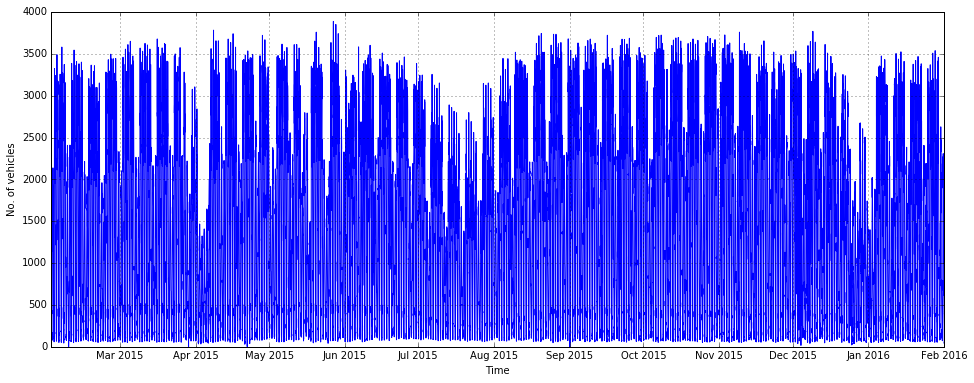

In [80]:
car_data=car_data[car_data.SENSOR_ID==choise_car_sensor_id]
plt.figure(figsize=(16,6))
plt.plot(car_data['TIME'],car_data['SUM'])
plt.xlabel('Time')
plt.ylabel('No. of vehicles')
plt.grid()
plt.show()

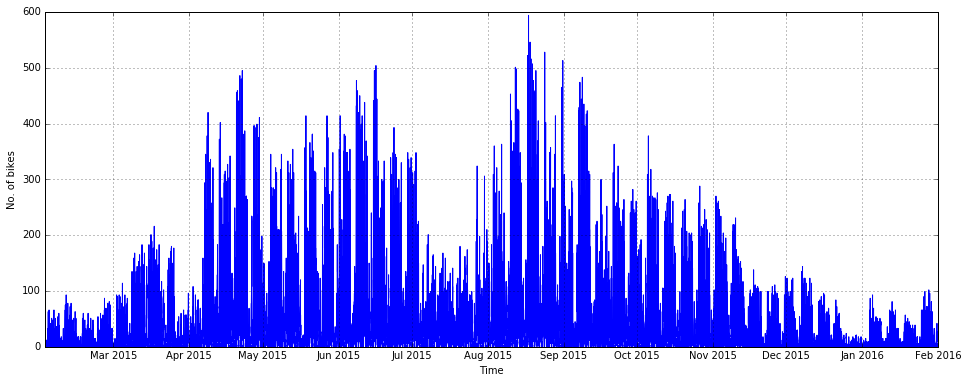

In [87]:
temp=cycle_data[cycle_data.SENSOR_ID==choice_cycle_sensor_id]
plt.figure(figsize=(16,6))
plt.plot(temp['TIME'],3*temp['SUM'])
plt.xlabel('Time')
plt.ylabel('No. of bikes')
plt.grid()
plt.show()

In [66]:
def violinplot(data_in,key,target,xlabel,ylabel,out_file):
    col_order = np.sort(data_in[key].unique()).tolist()
    plt.figure(figsize=(16,6))
    sns.violinplot(x=key, y=target, data=data_in)#, order=col_order)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid()
    #plt.show()
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()

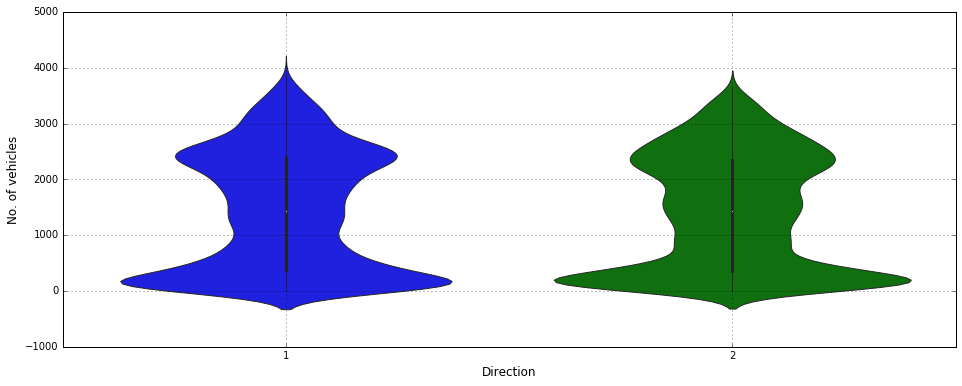

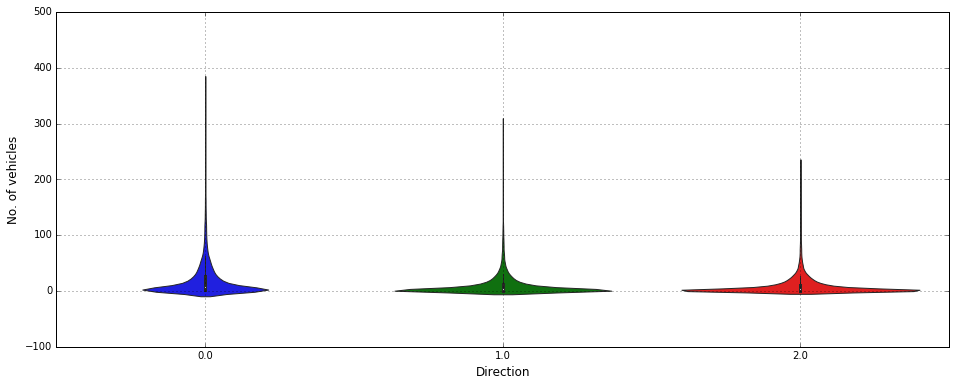

In [78]:
violinplot(car_data,'DIRECTION','SUM','Direction','No. of vehicles','car_count_vs_direction.pdf')
violinplot(cycle_data,'LANE','SUM','Direction','No. of vehicles','car_count_vs_direction.pdf')

Hourly variations in vehicles and bikes

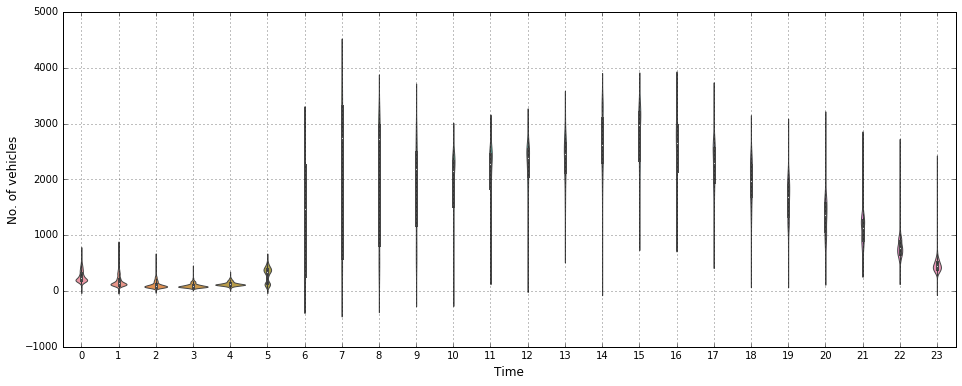

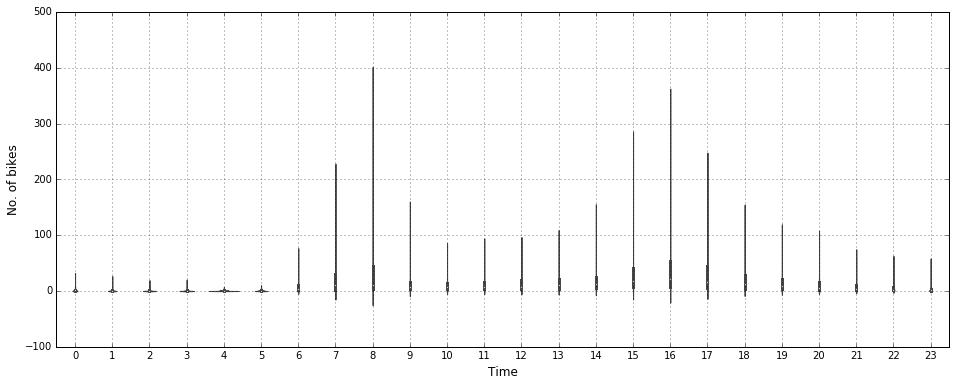

In [73]:
violinplot(car_data,'HOUR','SUM','Time','No. of vehicles','car_count_vs_hours.pdf')
violinplot(cycle_data,'HOUR','SUM','Time','No. of bikes','car_count_vs_hours.pdf')

Weekly variations in vehicles and bikes

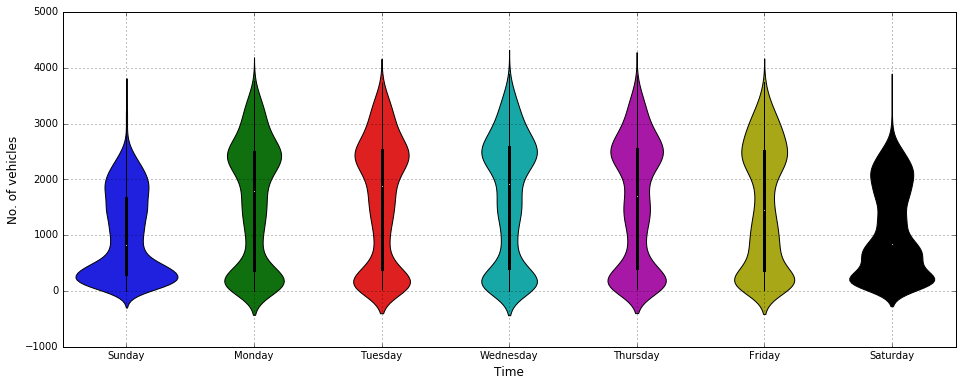

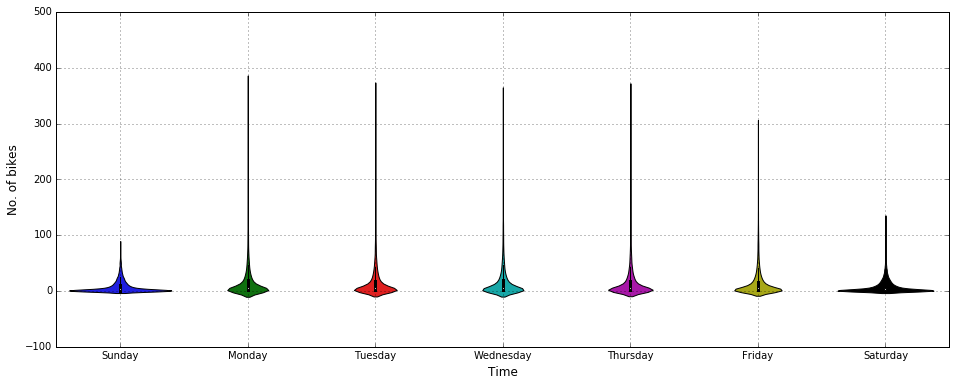

In [71]:
violinplot(car_data,'WEEKDAY','SUM','Time','No. of vehicles','car_count_vs_weekday.pdf')
violinplot(cycle_data,'WEEKDAY','SUM','Time','No. of bikes','cycle_count_vs_weekday.pdf')

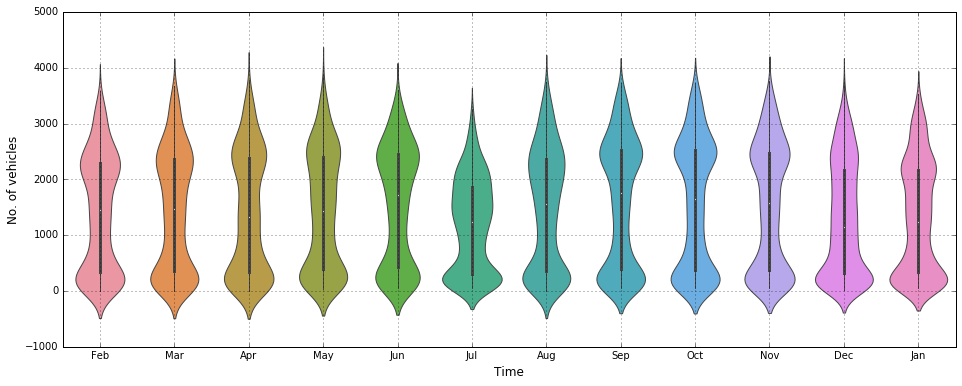

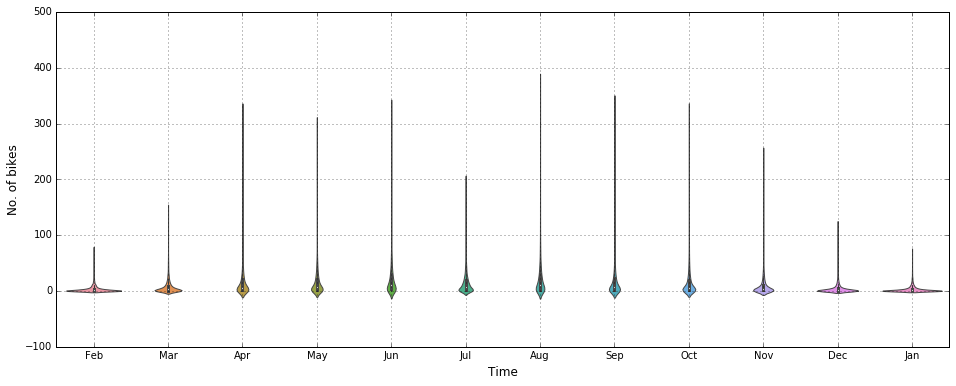

In [72]:
violinplot(car_data,'MONTH','SUM','Time','No. of vehicles','car_count_vs_month.pdf')
violinplot(cycle_data,'MONTH','SUM','Time','No. of bikes','cycle_count_vs_month.pdf')

Weather variations

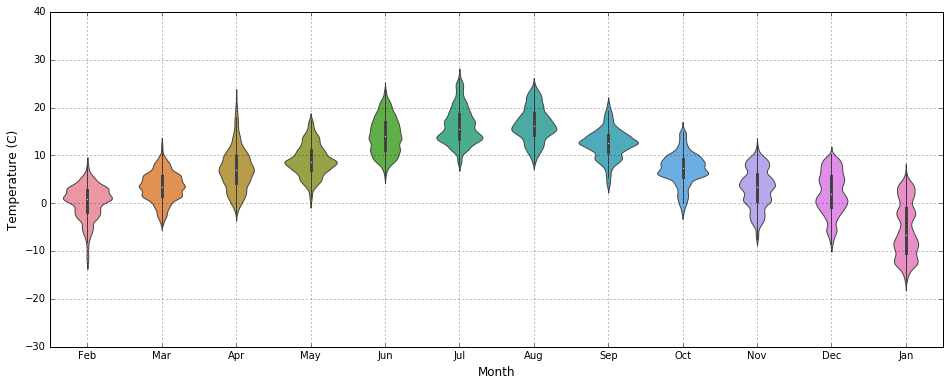

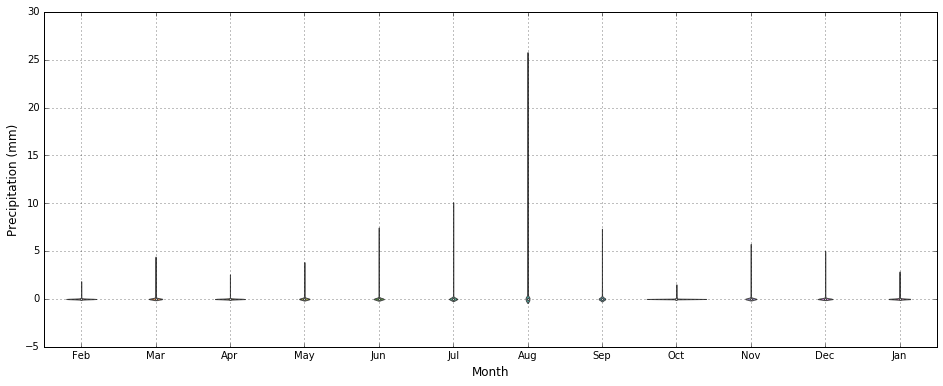

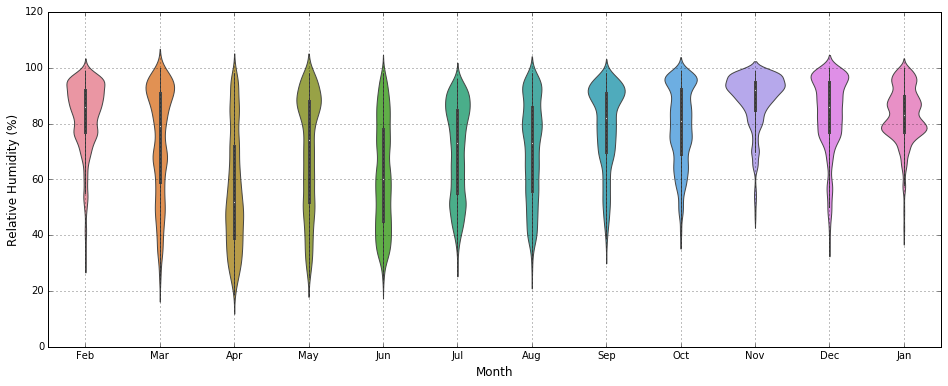

In [76]:
violinplot(cycle_data,'MONTH','TEMP','Month','Temperature (C)','temp_vs_month.pdf')
violinplot(cycle_data,'MONTH','PPT','Month','Precipitation (mm)','ppt_vs_month.pdf')
violinplot(cycle_data,'MONTH','RH','Month','Relative Humidity (%)','rh_vs_month.pdf')

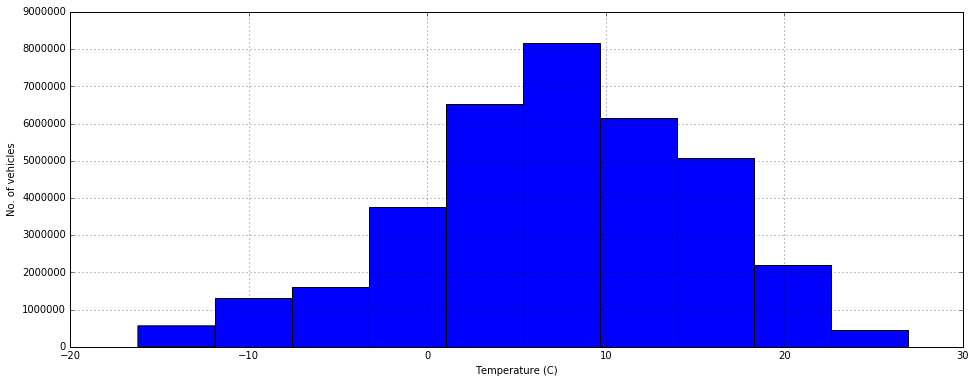

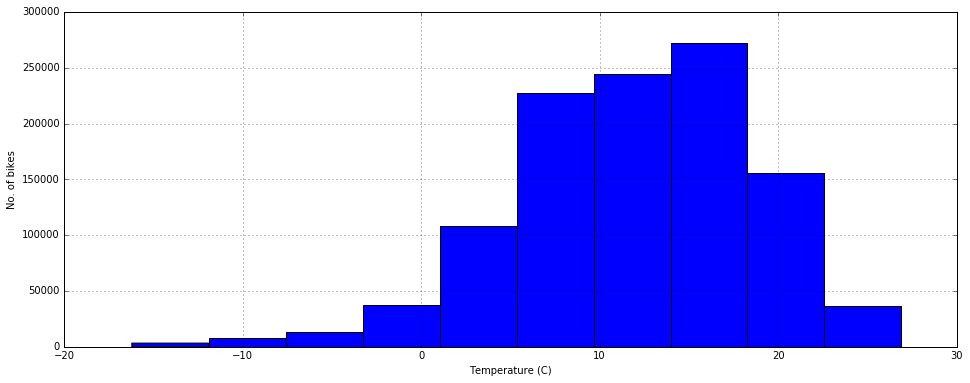

In [84]:
car_data.hist('TEMP',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('TEMP',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Temperature (C)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_temp.pdf',bbox_inches='tight')
plt.show()

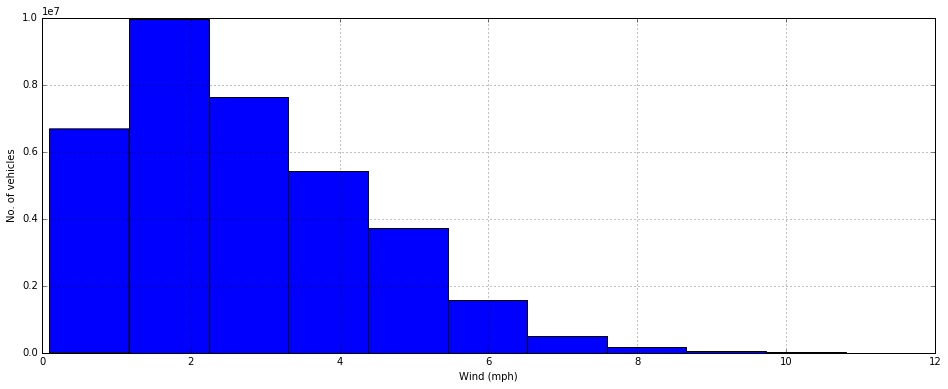

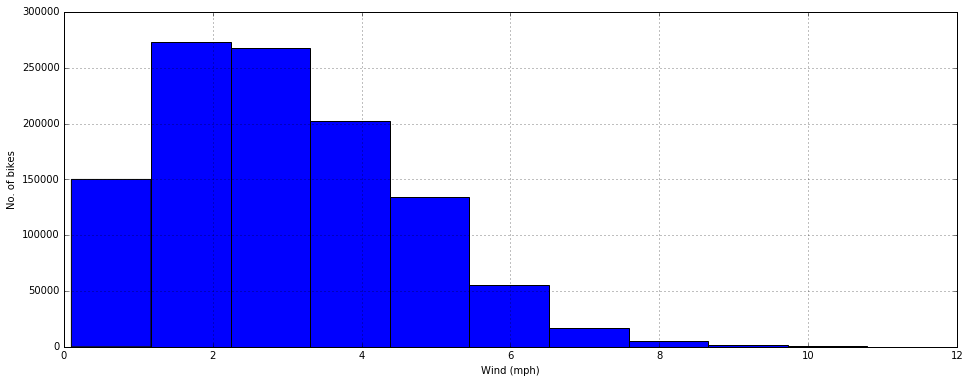

In [85]:
car_data.hist('WIND_MAG',weights=car_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of vehicles")
plt.title('')
plt.savefig('cars_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()

cycle_data.hist('WIND_MAG',weights=cycle_data['SUM'],figsize=(16,6))
plt.xlabel("Wind (mph)")
plt.ylabel("No. of bikes")
plt.title('')
plt.savefig('bikes_hist_count_vs_wind.pdf',bbox_inches='tight')
plt.show()